In [5]:
import pandas as pd
import os
import shutil
from tqdm.notebook import tqdm as tq
import pathlib
import gdown
import zipfile
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# ID file Google Drive
file_id = '1dQ3pnNXX0u4fcYK_80Ovz0DU37lgNTbV'
zip_name = 'combine_data.zip'

# Download file dari Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', zip_name, quiet=False)

# Buat folder untuk ekstrak
extract_path = 'combine_data'
os.makedirs(extract_path, exist_ok=True)

# Ekstrak ZIP
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Lihat isi folder
os.listdir(extract_path)


Downloading...
From (original): https://drive.google.com/uc?id=1dQ3pnNXX0u4fcYK_80Ovz0DU37lgNTbV
From (redirected): https://drive.google.com/uc?id=1dQ3pnNXX0u4fcYK_80Ovz0DU37lgNTbV&confirm=t&uuid=44c8419b-7e5e-4e05-a273-81a2eb82716d
To: /content/combine_data.zip
100%|██████████| 1.78G/1.78G [00:27<00:00, 63.6MB/s]


['Virus_keriting_daun_kuning',
 'Bercak_daun_Septoria',
 'Bercak_bakteri',
 'Tungau_dua_bercak',
 'Bercak_target',
 'Jamur_daun',
 'Sehat',
 'Virus_mosaik_tomat',
 'Embun_tepung',
 'Busuk_daun_awal',
 'Busuk_daun_lanjut']

In [3]:
mypath = "combine_data"

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
df.groupby(['labels']).size()

,0
labels,
Bercak_bakteri,3858
Bercak_daun_Septoria,3878
Bercak_target,3884
Busuk_daun_awal,3898
Busuk_daun_lanjut,3905
Embun_tepung,3906
Jamur_daun,3893
Sehat,3856
Tungau_dua_bercak,3882


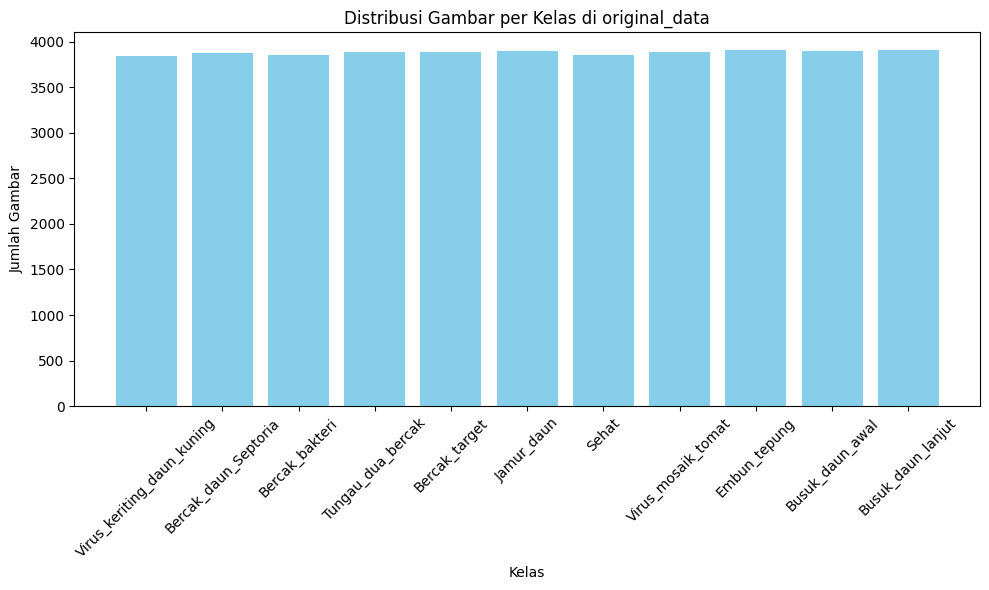

In [6]:
def plot_class_distribution(dataset_dir):
    """Menampilkan grafik distribusi jumlah gambar per kelas."""
    class_counts = {}

    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if os.path.isfile(os.path.join(class_dir, f))
            ])
            class_counts[class_name] = num_images

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title('Distribusi Gambar per Kelas di original_data')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah Gambar')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Tampilkan grafik
plot_class_distribution('combine_data')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42684 entries, 0 to 42683
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       42684 non-null  object
 1   file_name  42684 non-null  object
 2   labels     42684 non-null  object
dtypes: object(3)
memory usage: 1000.5+ KB


In [8]:
X= df['path']
y= df['labels']

#Split Data Training:Validation:Testing = 70:15:15

# Split 15% untuk test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Dari 85% data sisa, ambil 15/85 ≈ 0.176 untuk validation, sisanya jadi train
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42)


In [9]:
df_tr = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_val = pd.DataFrame({'path': X_val, 'labels': y_val, 'set': 'val'})
df_te = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

df_all = pd.concat([df_tr, df_val, df_te]).reset_index(drop=True)

In [10]:
# Print hasil untuk melihat panjang size data training, validation, dan testing
print('Train size:', len(df_tr))
print('Validation size:', len(df_val))
print('Test size:', len(df_te))


Train size: 29895
Validation size: 6386
Test size: 6403


In [11]:
# Gabungkan semuanya menjadi satu DataFrame akhir
df_all = pd.concat([df_tr, df_val, df_te]).reset_index(drop=True)

In [12]:
# Gabungkan DataFrame df_tr, df_val, dan df_te
df_all = pd.concat([df_tr, df_val, df_te], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sample data
print(df_all.sample(5))



set    labels                    
test   Bercak_bakteri                 579
       Bercak_daun_Septoria           582
       Bercak_target                  583
       Busuk_daun_awal                585
       Busuk_daun_lanjut              586
       Embun_tepung                   586
       Jamur_daun                     584
       Sehat                          578
       Tungau_dua_bercak              582
       Virus_keriting_daun_kuning     575
       Virus_mosaik_tomat             583
train  Bercak_bakteri                2702
       Bercak_daun_Septoria          2716
       Bercak_target                 2720
       Busuk_daun_awal               2730
       Busuk_daun_lanjut             2735
       Embun_tepung                  2736
       Jamur_daun                    2726
       Sehat                         2701
       Tungau_dua_bercak             2719
       Virus_keriting_daun_kuning    2688
       Virus_mosaik_tomat            2722
val    Bercak_bakteri                 577

In [13]:
datasource_path = "combine_data"
dataset_path = "Dataset-Final/"

In [14]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
      file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

In [15]:
# Buat file zip dari folder combine_data
shutil.make_archive('Dataset-Final', 'zip', 'Dataset-Final')

'/content/Dataset-Final.zip'